# Data processing

In [20]:
import pandas as pd
import numpy as np
import pylab as pl
import sklearn.preprocessing as sp
import csv
import re
import dateutil
import math

np.set_printoptions(linewidth=150, precision=3, suppress=True)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
ts_parser = lambda date_str: datetime.datetime.strptime(date_str, "%Y-%m") if pd.notnull(date_str) and date_str else None
df_users = pd.read_csv("hw1_out.csv", sep="\t", encoding="utf-8", quoting=csv.QUOTE_NONNUMERIC, converters={"created_at": ts_parser})
# Remove rows with users not found
df_users = df_users[pd.notnull(df_users['name'])]
df_users["lat"].fillna(value=0, inplace=True)
df_users["lon"].fillna(value=0, inplace=True)

df_users

,uid,cat,name,screen_name,description,verified,location,lat,lon,country,created_at,followers_count,friends_count,statuses_count,favourites_count,listed_count
0,40585382,1,Reverend Sue,ReverendSue,Retired Interfaith Minister. Activist. Equalit...,False,United States,39.76000,-98.50000,United States,2009-05-01,7616,4283,50626,787,417
1,30005269,0,Ryan Wrasse,RWrasse,Communications Director for @SenJohnThune | Ge...,False,Capitol Hill,15.20825,145.75313,Northern Mariana Islands,2009-04-01,1911,1240,7139,128,96
2,3314758074,0,Campaign Trump,Campaign_Trump,Moving on to #SuperTuesday. Indp. Local & Inte...,False,"Houston, TX",29.76328,-95.36327,United States,2015-08-01,18143,12455,991,7055,159
3,14311688,0,Bernard Whitman,BernardWhitman,"Democratic strategist, pollster, and corporate...",False,New York,40.71427,-74.00597,United States,2008-04-01,1757,1292,7332,157,111
4,110457801,0,Carson Ingle,caingle,Writer for @AthleteSpeakers & @NOPACTalent. 10...,False,Orlando aka The City Beautiful,0.00000,0.00000,NaN,2010-02-01,1467,1189,37100,3310,79
5,269062860,1,"Chicago sports, etc",ChiTownSports,Unconventional & irreverent. Mostly sports but...,False,Chicago,41.85003,-87.65005,United States,2011-03-01,15183,9328,125629,86,276
6,1656126090,0,Chicks'n'Politics,ChicksnPolitics,Civically Engaged | Networking | Events | IG: ...,False,Florida,28.75054,-82.50010,United States,2013-08-01,311,476,1146,445,4
7,758669826,1,USU Democrats,usudemocrats,USU College Democrats–– All Things Democratic ...,False,"Logan, UT",41.73549,-111.83439,United States,2012-08-01,415,586,326,46,14
8,21056856,1,Socialmarketers,socmarketers,Do gooder. Founder of 1st Linkedin #socialmark...,False,"Washington, DC",38.89511,-77.03637,United States,2009-02-01,4614,628,1090,40,56
9,954363313,1,AAPI Democrats SD,AAPIDemsSD,The AAPI Democratic Club shall advocate for As...,False,"San Diego, California",32.71533,-117.15726,United States,2012-11-01,120,66,179,68,12


Далее необходимо ввести новые признаки. Для каждого пользователя предлагается ввести следующие признаки:
- name_words - количество слов в имени
- screen_name_length - количество символов в псевдониме
- description_length - длина описания
- created_year - год создания аккаунта
- country_code - код страны
- verified - предлагается перевести в тип int

In [22]:
def create_new_features(df_users, features):
    # Introduce new features
    new_features = ["name_words", "screen_name_length", "description_length", "created_year", "country_code", "verified"]
    
    name_words = []
    screen_name_length = []
    description_length = []
    created_year = []
    country_code = []
    
    dict_country = {nan:0}
    index_country = 0;
    
    for index, row in df_users.iterrows():
        name_words.append(len(row["name"].split()))
        screen_name_length.append(len(row["screen_name"]))
        
        if not pd.notnull(row["description"]):
            description_length.append(0)
        else:
            description_length.append(len(row["description"]))
            
        created_year.append(int(row["created_at"].year))
        
        if row["country"] not in dict_country:
            dict_country[row["country"]] = index_country
            index_country = index_country + 1
        
        country_code.append(dict_country[row["country"]])
        
        """if not pd.notnull(row["verified"]):
            df_users.loc[index, 'verified'] = 0
        else:
            df_users.loc[index, 'verified'] = int(row["verified"])"""
        
    df_users.verified = df_users.verified.factorize()[0] 
    df_users.insert(16,'name_words', name_words)
    df_users.insert(17,'screen_name_length',screen_name_length) 
    df_users.insert(18,'description_length',description_length) 
    df_users.insert(19,'created_year',created_year) 
    df_users.insert(20,'country_code',country_code)  
    
    features.extend(new_features)
        
    # Add new_features to features
    # Calculate new features and place them into data frame
    
    return df_users, features

In [23]:
features = ["lat", "lon", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count"]
df_users, features = create_new_features(df_users, features)

x = df_users[pd.notnull(df_users.cat)][features].values
y = df_users[pd.notnull(df_users.cat)]["cat"].values

Посмотрим, являются ли какие-либо из выбранных признаков сильно скоррелированными. Для этого посчитаем матрицу корреляций и выберем те пары признаков, фбсолютное значения коэффициента корреляции между которыми больше 0.2. Необходимо реализовать функцию find_correlated_features, в которой нужно рассчитать коэффициенты корелляции и вывести те, которые больше 0.2.

In [24]:
def find_correlated_features(x, features):
    # replace this code to find really correlated features
    matrix_corr = np.corrcoef(x, rowvar = 0)
    for i, feature_i in enumerate(features): 
        for j, feature_j in enumerate(features):
            if i < j and matrix_corr[i][j] > 0.2:
                print "Correlated features: %s + %s -> %.2f" % (feature_i, feature_j, matrix_corr[i][j])
    

In [25]:
find_correlated_features(x, features)

Correlated features: lon + country_code -> 0.28
Correlated features: followers_count + friends_count -> 0.80
Correlated features: followers_count + listed_count -> 0.93
Correlated features: friends_count + listed_count -> 0.71
Correlated features: statuses_count + favourites_count -> 0.28
Correlated features: listed_count + verified -> 0.21
Correlated features: screen_name_length + created_year -> 0.20


Выделилось 3 группы признаков:
1. Основанные на географии:  "lat", "lon", "country_code"
2. Основанные на социальной активности:  "verified", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count", "created_year"
3. Остальные:  "name_words", "screen_name_length", "description_length"

Построим взаимные распределения пар признаков в каждой из групп, а также гистограмму значений каждого из признаков с учетом целевой переменной.

In [26]:
def plot_two_features_scatter(x_i, x_j, y):
    x_i_pos = [x_i[i] for i in range(y.size) if y[i] == 1.0]
    x_j_pos = [x_j[i] for i in range(y.size) if y[i] == 1.0]
    
    x_i_neg = [x_i[i] for i in range(y.size) if y[i] == 0.0]
    x_j_neg = [x_j[i] for i in range(y.size) if y[i] == 0.0]
    
    ind_begin = 0;
    ind_end = 200;
    while ind_end < len(x_i_pos) and  ind_end < len(x_i_neg):
        pl.scatter(x_i_pos[ind_begin:ind_end], x_j_pos[ind_begin:ind_end], c = 'b',s=30, marker='o')
        pl.scatter(x_i_neg[ind_begin:ind_end], x_j_neg[ind_begin:ind_end], c = 'b',s=30, marker='o')
        ind_begin = ind_end
        ind_end = ind_end + 200
    # Set colors and plot scatter    
    pass    

    
def plot_feature_histogram(x_i, y):
    
    # Compute positive and negative histograms
    x_i_pos = [x_i[i] for i in range(y.size) if y[i] == 1.0 and pd.notnull(x_i[i])]
    x_i_neg = [x_i[i] for i in range(y.size) if y[i] == 0.0 and pd.notnull(x_i[i])]
    
    #pl.hist([x_i_pos, x_i_neg], color = ['b', 'r'], histtype = 'bar', align='mid')  !!!
    pl.hist(x_i, color = 'b', histtype = 'bar', align='mid')
    # Plot stacked barplots
    # your code here
    
    pass


def plot_dataset(x, y, features):
    # Tune your plot if necessary
    pl.figure(figsize = (7 * len(features), 7 * len(features)))

    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            
            # Tune your plot if necessary (for example set labels)
            # Do actual plotting
            if i != j :
                subplot(len(features), len(features), i * len(features) + j + 1)
                pl.xlabel(feature_i)
                pl.ylabel(feature_j)
                plot_two_features_scatter(x[:, i], x[:, j], y)            
            else:
                subplot(len(features), len(features), i * len(features) + j + 1)
                pl.xlabel(feature_i)
                pl.ylabel(feature_j)
                plot_feature_histogram(x[:, i], y)
    
    pl.show()

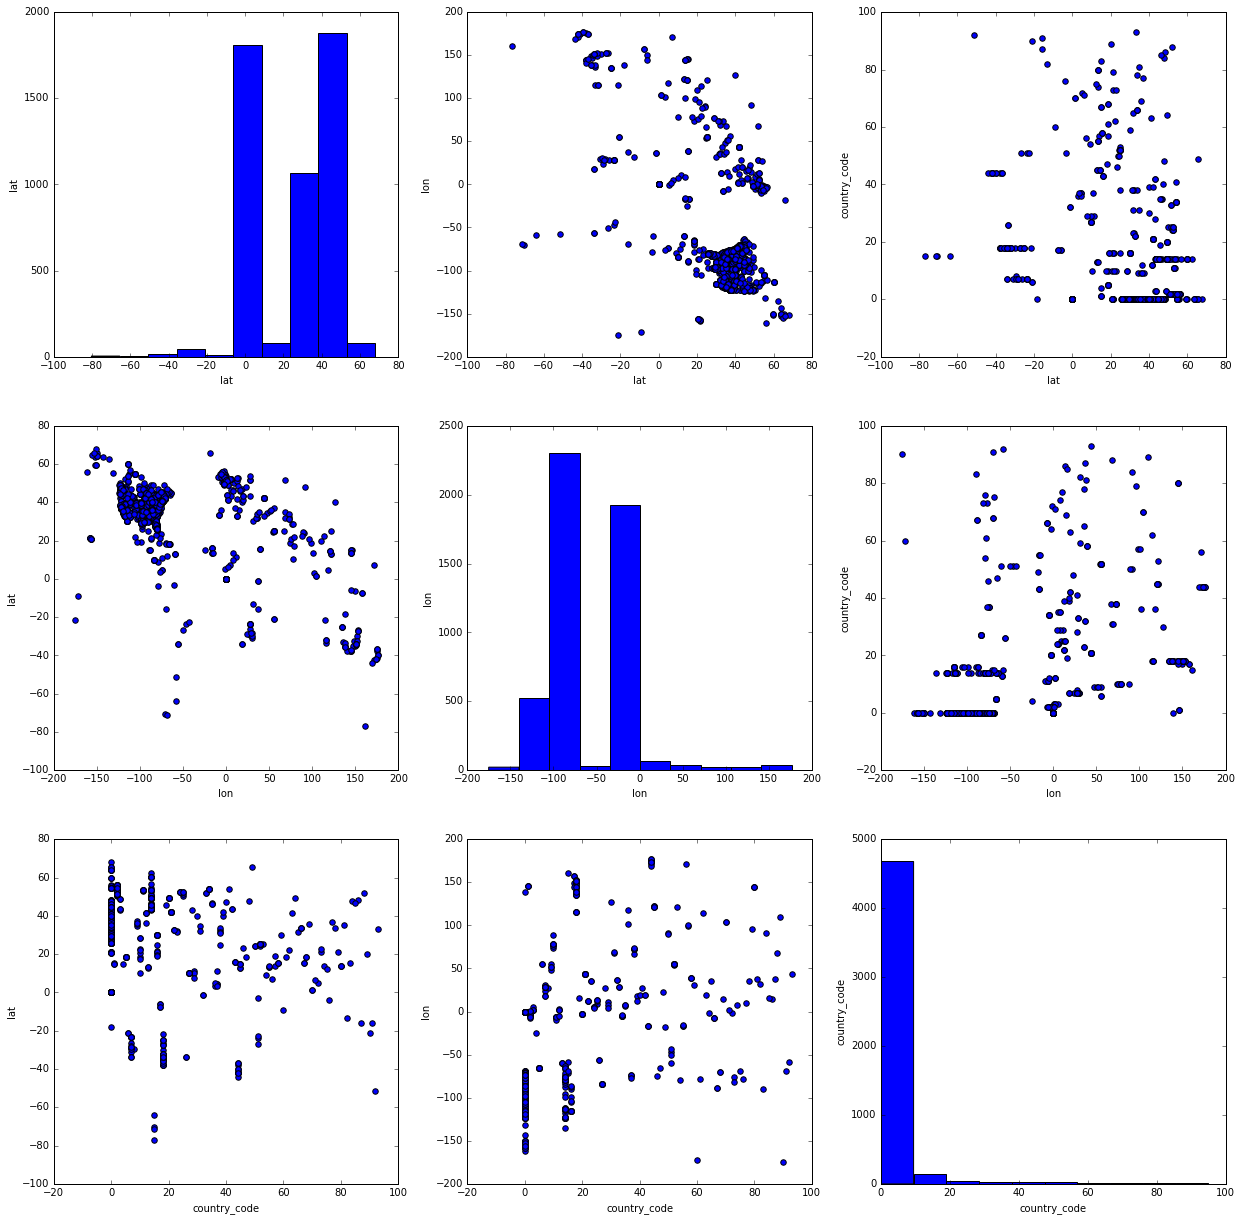

In [27]:
geo_features_new = ["lat", "lon", "country_code"]
geo_features = [f for f in geo_features_new if f in features]

geo_feature_ind = [i for i, f in enumerate(features) if f in geo_features]

plot_dataset(x[:, geo_feature_ind], y, geo_features)

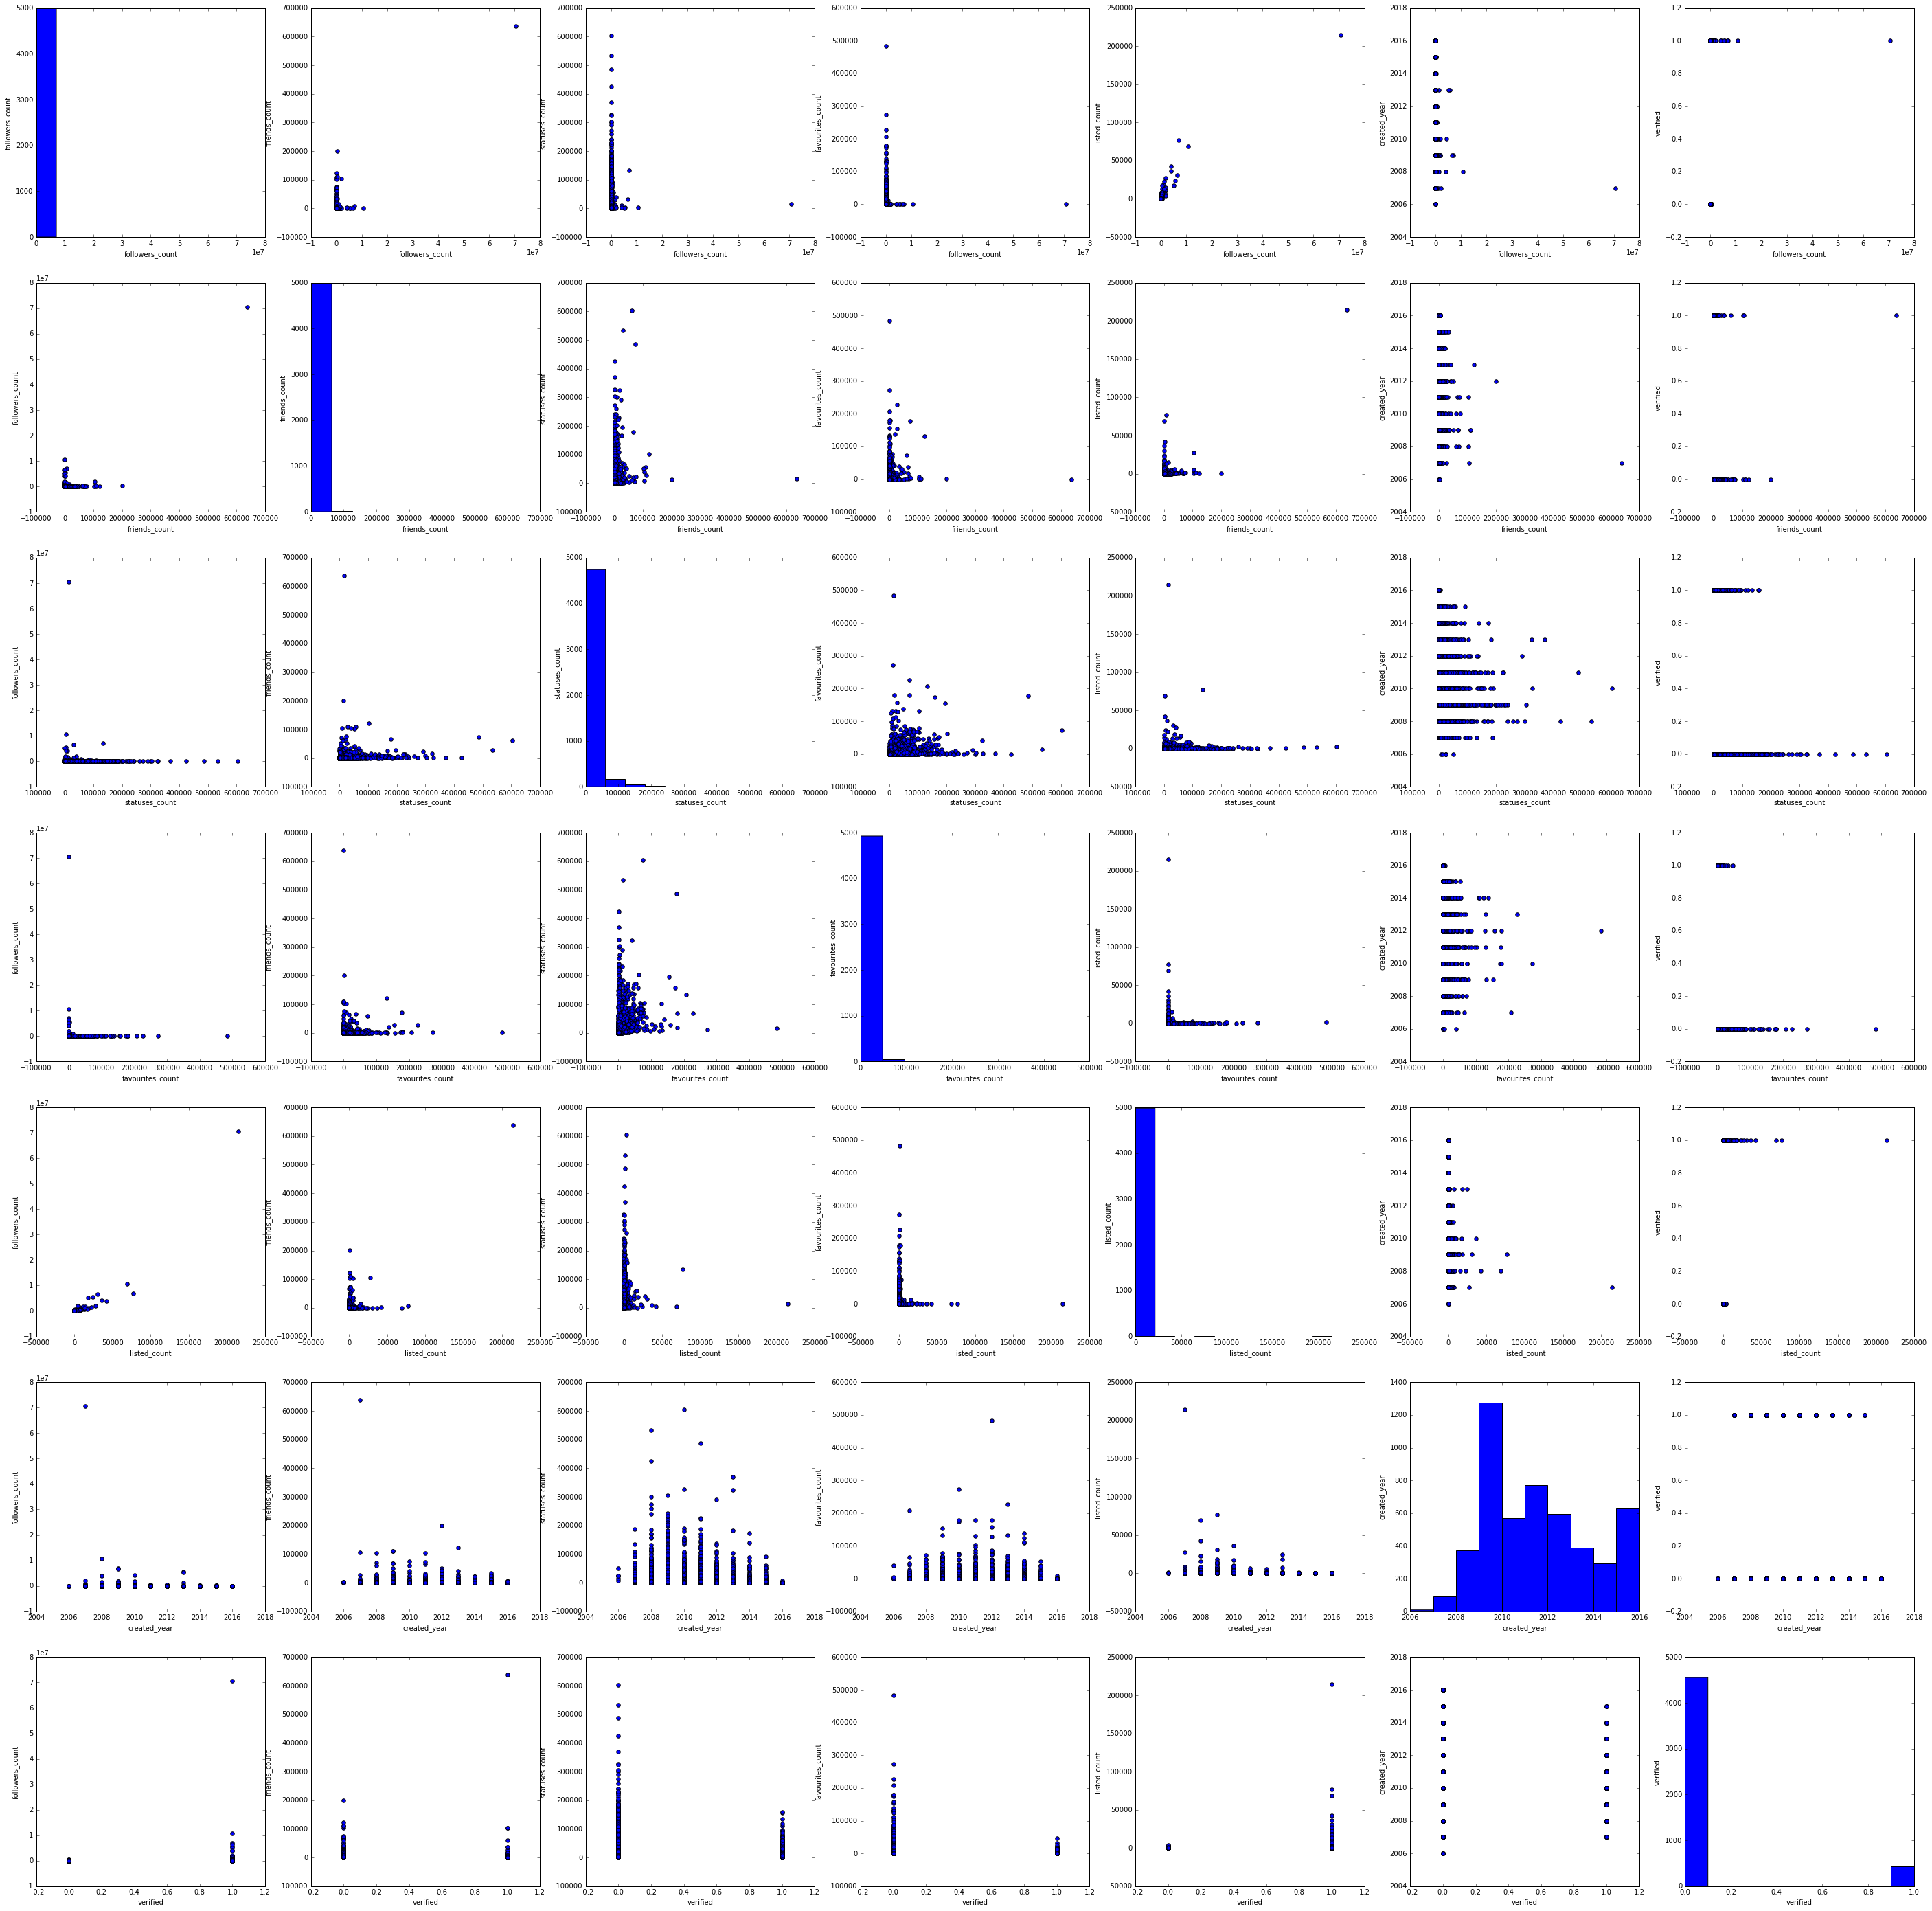

In [28]:
social_features_new = ["verified", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count", "created_year"]
social_features = [f for f in features if f in social_features_new]
social_feature_ind = [i for i, f in enumerate(features) if f in social_features]
plot_dataset(x[:, social_feature_ind], y, social_features)

In [29]:
def log_transform_features(data, features, transformed_features):
    transformed_features_ind = [i for i, f in enumerate(features) if f in transformed_features]
    data[:, transformed_features_ind] = np.log1p(data[:, transformed_features_ind])
    # transform selected features with log function
    return data

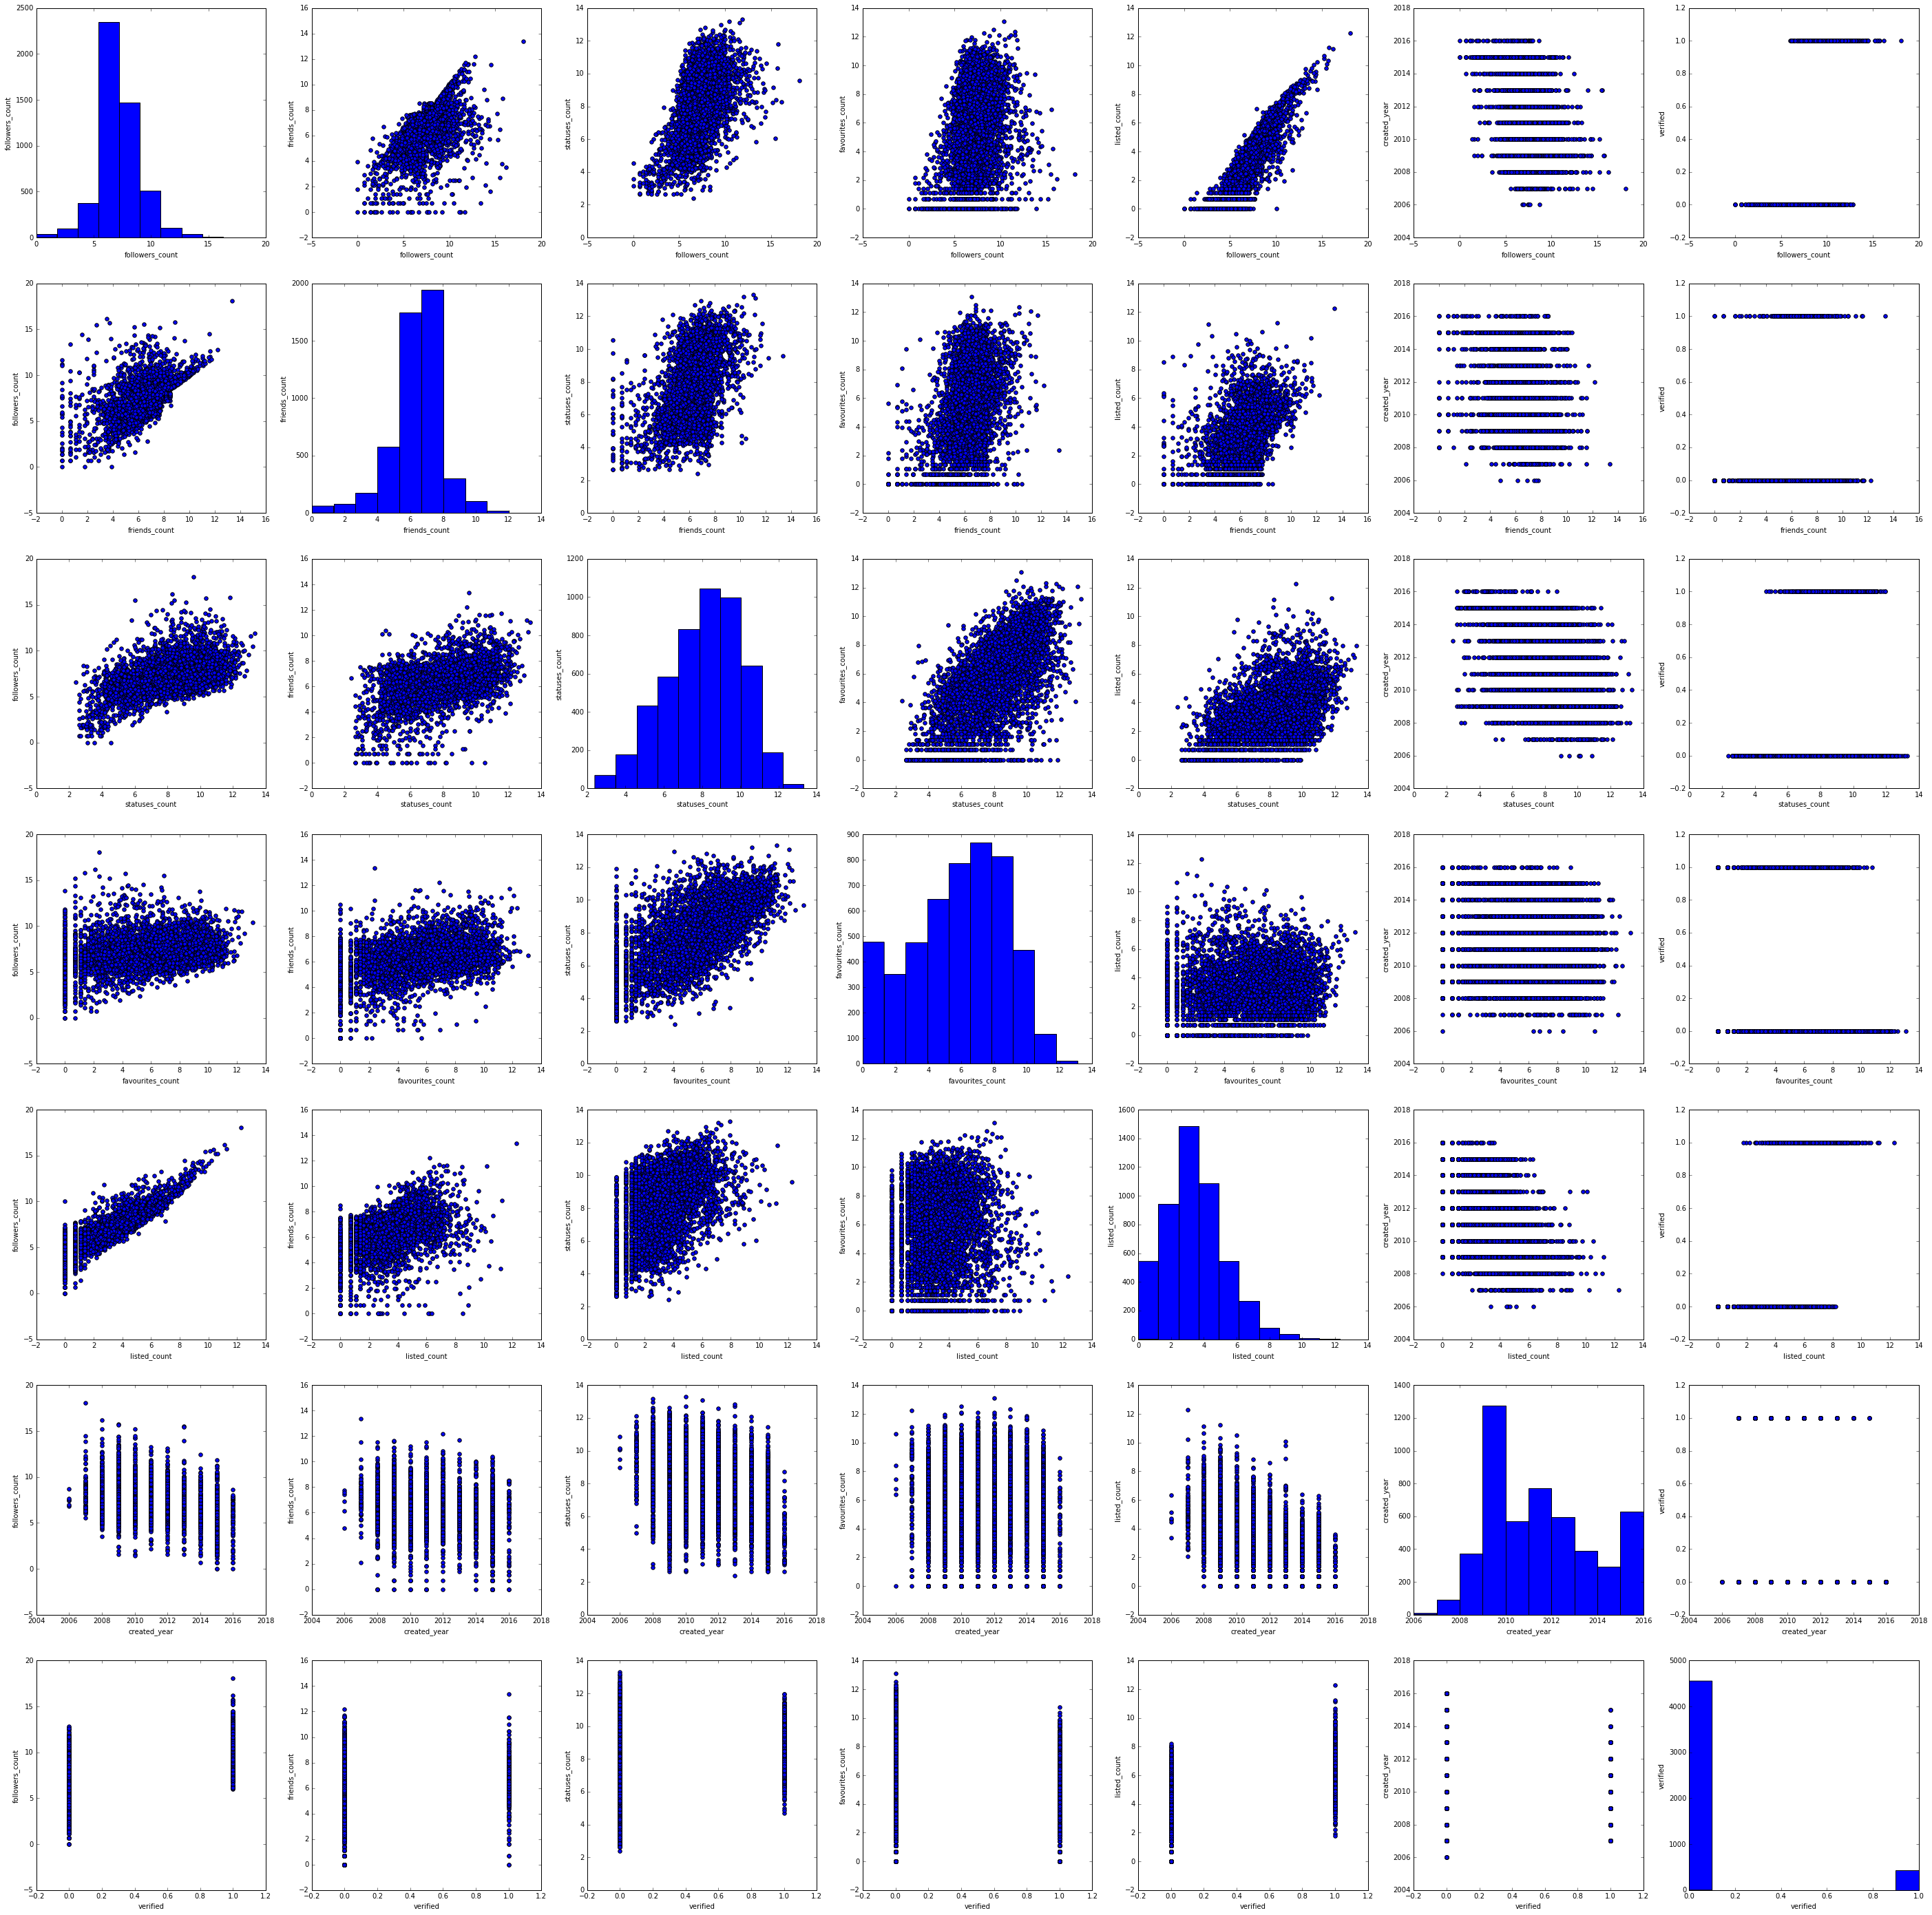

In [30]:
transformed_features = ["followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count"]
x = log_transform_features(x, features, transformed_features)

# Re-plot features
plot_dataset(x[:, social_feature_ind], y, social_features)

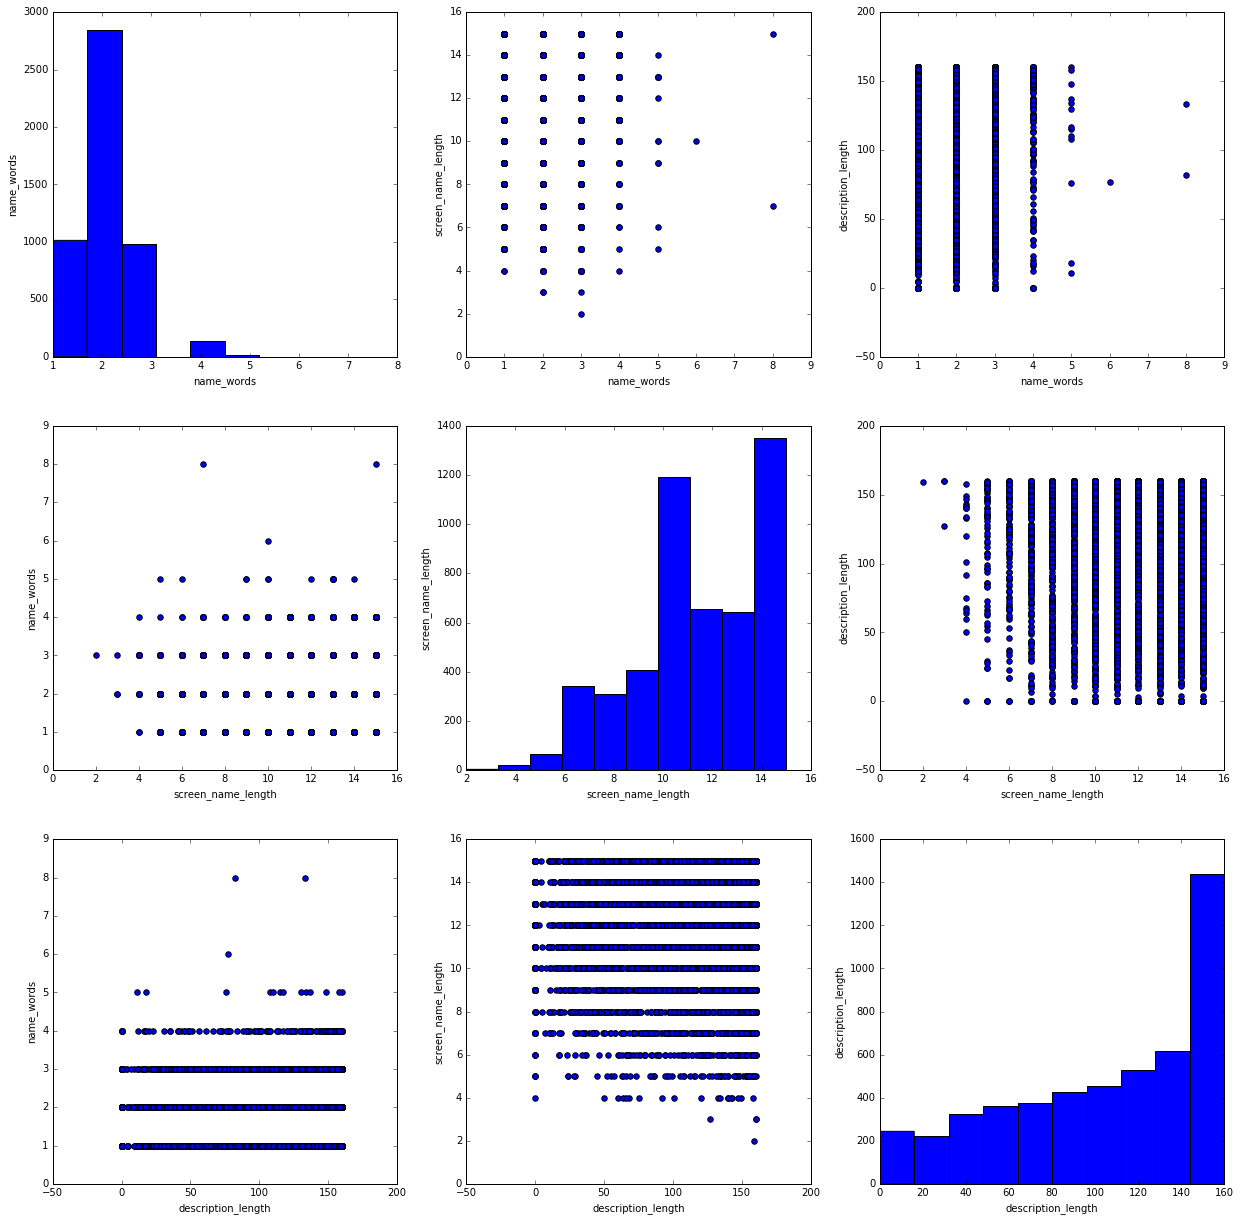

In [31]:
other_features_new = ["name_words", "screen_name_length", "description_length"]
other_features = [f for f in other_features_new if f in features]
other_feature_ind = [i for i, f in enumerate(features) if f in other_features]
plot_dataset(x[:, other_feature_ind], y, other_features)

In [20]:
selected_features = ["followers_count", "friends_count", "statuses_count", "favourites_count", 
                     "listed_count", "created_year", "name_words", "screen_name_length", "description_length"]

x_1 = df_users[selected_features].values
y = df_users["cat"].values

# x_1 = x[:, selected_features_ind]
# Replace nan with 0-s
# Is there a smarter way?
"""x_1[np.isnan(x_1)] = 0
x_min = x_1.min(axis=0)
x_max = x_1.max(axis=0)
x_new = (x_1 - x_min) / (x_max - x_min)"""

from sklearn import preprocessing

x_new = preprocessing.normalize(x_1)

In [21]:
df_out = pd.DataFrame(data=x_new, index=df_users["uid"], columns=[f for f in selected_features])
df_out.to_csv("data.csv", sep="\t")